<a href="https://colab.research.google.com/github/SubhashAnagalabyluRamachandra/Telecom-Churn-Predictor-with-Random-Forest-Using-Python/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

,id,churn
0,1,no
1,2,no
2,3,yes
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


Accuracy: 0.9635294117647059
Precision: 0.9622641509433962
Recall: 0.7906976744186046
Confusion Matrix:
[[717   4]
 [ 27 102]]
Cross-Validation Scores: [0.94352941 0.96235294 0.96       0.95176471 0.96352941]
Average Cross-Validation Score: 0.9562352941176471


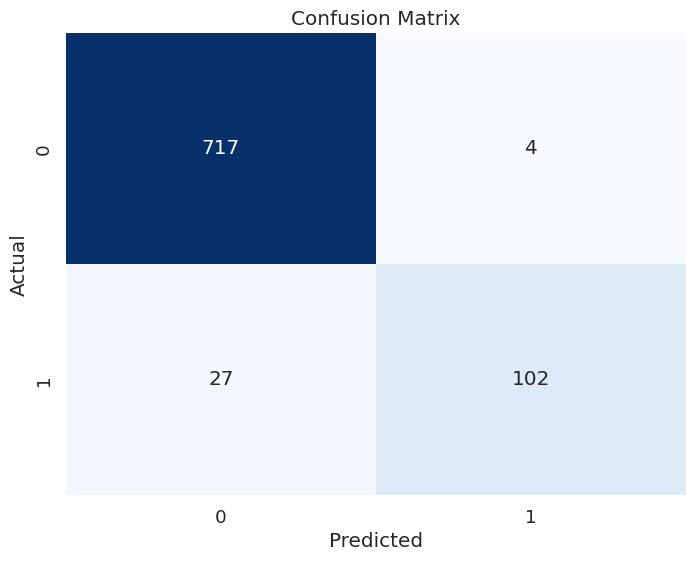

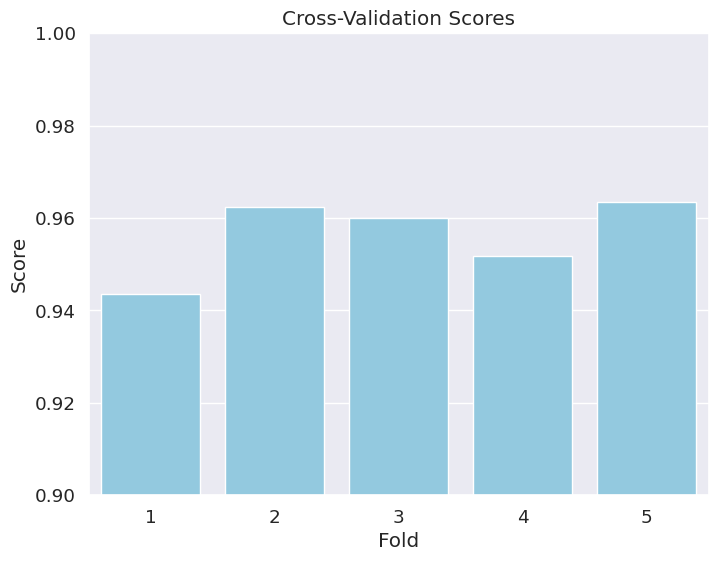

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
train_path = "/content/train.csv"
test_path = "/content/test.csv"

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
train_data.head()  # View the first few rows of the training data
train_data.info()  # Get information about the training data (e.g., data types, missing values)
# Preprocess the data
label_encoder = LabelEncoder()
categorical_columns = ["state", "area_code", "international_plan", "voice_mail_plan"]

for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

# Split the data into input features (X) and the target variable (y)
X = train_data.drop("churn", axis=1)
y = train_data["churn"]

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set (excluding the "id" column)
test_data_predictions = model.predict(test_data.drop("id", axis=1))

# Create a DataFrame with the test predictions (including the "id" column)
submission_df = pd.DataFrame({"id": test_data["id"], "churn": test_data_predictions})
display(submission_df)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
val_predictions = model.predict(X_val)
accuracy = accuracy_score(y_val, val_predictions)
precision = precision_score(y_val, val_predictions, pos_label='yes')
recall = recall_score(y_val, val_predictions, pos_label='yes')
confusion_mat = confusion_matrix(y_val, val_predictions)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(confusion_mat)
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar Plot for Cross-Validation Scores
plt.figure(figsize=(8, 6))
sns.barplot(x=[1, 2, 3, 4, 5], y=cv_scores, color='skyblue')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)  # Set the y-axis limits for better visualization
plt.show()
